In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_path = os.path.join('data','city_data.csv')
ride_path = os.path.join('data','ride_data.csv')

# Read the City and Ride Data
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

# Combine the data into a single dataset
merged_pyber_data = pd.merge(ride_data,city_data, how = 'outer')

# Display the data table for preview
merged_pyber_data.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
urban_data = merged_pyber_data.loc[merged_pyber_data['type'] == 'Urban',:]
urban_gb_city = urban_data.groupby('city')
urban_avg_fair_percity = urban_gb_city['fare'].mean()
urban_city_ride_count = urban_gb_city['city'].count()
urban_driver_count = urban_gb_city['driver_count'].first()


surban_data = merged_pyber_data.loc[merged_pyber_data['type'] == 'Suburban',:]
surban_gb_city = surban_data.groupby('city')
surban_avg_fair_percity = surban_gb_city['fare'].mean()
surban_city_ride_count = surban_gb_city['city'].count()
surban_driver_count = surban_gb_city['driver_count'].first()

rural_data = merged_pyber_data.loc[merged_pyber_data['type'] == 'Rural',:]
rural_gb_city = rural_data.groupby('city')
rural_avg_fair_percity = rural_gb_city['fare'].mean()
rural_city_ride_count = rural_gb_city['city'].count()
rural_driver_count = rural_gb_city['driver_count'].first()


## Bubble Plot of Ride Sharing Data

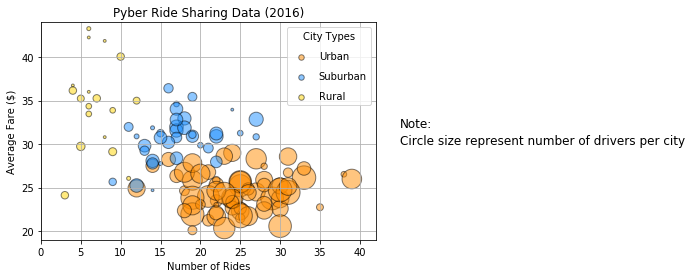

In [5]:
# Obtain the x and y coordinates for each of the three city types
#urban
x_urban = urban_city_ride_count
y_urban = urban_avg_fair_percity
s_urban = urban_driver_count
#suburban
x_surban = surban_city_ride_count
y_surban = surban_avg_fair_percity
s_surban = surban_driver_count
#rural
x_rural = rural_city_ride_count
y_rural = rural_avg_fair_percity
s_rural = rural_driver_count

# Build the scatter plots for each city types
plt.scatter (x_urban,y_urban,s=s_urban*8,alpha = '0.5', c= 'darkorange',edgecolors="black",label = 'Urban')
plt.scatter (x_surban,y_surban,s=s_surban*8,alpha = '0.5', c= 'dodgerblue',edgecolors="black",label = 'Suburban')
plt.scatter (x_rural,y_rural,s=s_rural*8,alpha = '0.5', c= 'gold',edgecolors="black",label = 'Rural')

# Incorporate the other graph properties
plt.grid()
plt.ylim(19,44)
plt.xlim(0,42)
plt.rcParams['figure.figsize'] = (6,4)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($)")
# Create a legend

lgnd = plt.legend(loc='upper right', labelspacing = 1, title = 'City Types')
#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(45,32,'Note:',fontsize=12)
plt.text(45,30,'Circle size represent number of drivers per city',fontsize=12)
# Save Figure
plt.savefig("Pyberbubble.png")

## Total Fares by City Type

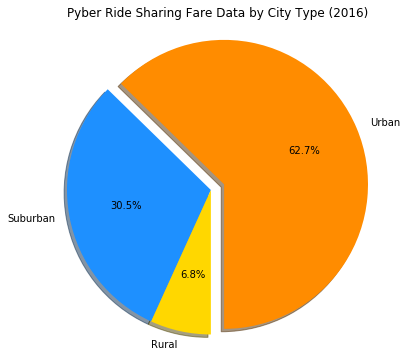

<Figure size 432x288 with 0 Axes>

In [57]:
# Calculate Type Percents

urban_gb_type = urban_data.groupby('type')
urban_tot_fare_type = urban_gb_type['fare'].sum()

surban_gb_type = surban_data.groupby('type')
surban_tot_fare_type = surban_gb_type['fare'].sum()

rural_gb_type = rural_data.groupby('type')
rural_tot_fare_type = rural_gb_type['fare'].sum()

tot_fare = merged_pyber_data['fare'].sum()

urban_fare_percent = urban_tot_fare_type / tot_fare *100
surban_fare_percent = surban_tot_fare_type / tot_fare *100
rural_fare_percent = rural_tot_fare_type / tot_fare * 100
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_fare_percent, surban_fare_percent, rural_fare_percent]
colors = ['darkorange', 'dodgerblue', "gold"]
explode = (0.1, 0, 0)
fig = plt.figure(figsize=(6,6))
plt.title("Pyber Ride Sharing Fare Data by City Type (2016)")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=270,autopct="%1.1f%%")
plt.axis("equal")
plt.show()
# Save Figure

plt.savefig("Pyber Fares by Type.png")

## Total Rides by City Type

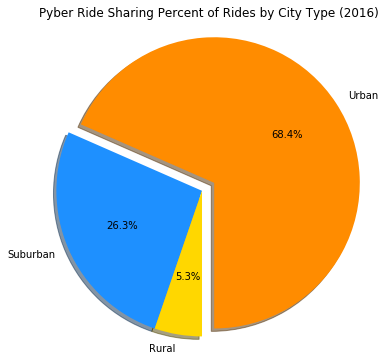

<Figure size 432x288 with 0 Axes>

In [70]:
urban_gb_type = urban_data.groupby('type')
urban_tot_rides_type = urban_gb_type['type'].count()

surban_gb_type = surban_data.groupby('type')
surban_tot_rides_type = surban_gb_type['type'].count()

rural_gb_type = rural_data.groupby('type')
rural_tot_rides_type = rural_gb_type['type'].count()

tot_rides = merged_pyber_data['type'].count()

urban_rides_percent = urban_tot_rides_type / tot_rides *100
surban_rides_percent = surban_tot_rides_type / tot_rides *100
rural_rides_percent = rural_tot_rides_type / tot_rides * 100
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_rides_percent, surban_rides_percent, rural_rides_percent]
colors = ['darkorange', 'dodgerblue', "gold"]
explode = (0.1, 0, 0)
fig = plt.figure(figsize=(6,6))
plt.title("Pyber Ride Sharing Percent of Rides by City Type (2016)")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=270,autopct="%1.1f%%")
plt.axis("equal")
plt.show()
# Save Figure

plt.savefig("Pyber Rides by Type.png")


## Total Drivers by City Type

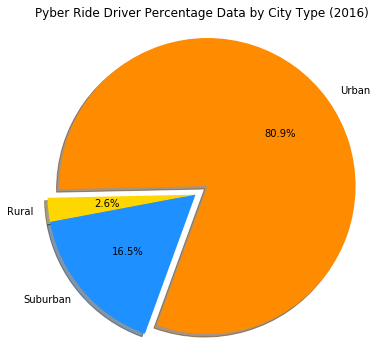

<Figure size 432x288 with 0 Axes>

In [80]:
city_driver_data =city_data.loc[city_data['type'] == 'Urban',:]
urban_driver_type = city_driver_data.groupby('type')
urban_tot_driver_type = urban_driver_type['driver_count'].sum()

city_driver_data =city_data.loc[city_data['type'] == 'Suburban',:]
surban_driver_type = city_driver_data.groupby('type')
surban_tot_driver_type = surban_driver_type['driver_count'].sum()

city_driver_data =city_data.loc[city_data['type'] == 'Rural',:]
rural_driver_type = city_driver_data.groupby('type')
rural_tot_driver_type = rural_driver_type['driver_count'].sum()


tot_drivers = city_data['driver_count'].sum()
urban_driver_percent = urban_tot_driver_type / tot_drivers *100
surban_driver_percent = surban_tot_driver_type / tot_drivers *100
rural_driver_percent = rural_tot_driver_type / tot_drivers * 100
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_driver_percent, rural_driver_percent, surban_driver_percent]
colors = ['darkorange', 'gold', "dodgerblue"]
explode = (0.1, 0, 0)
fig = plt.figure(figsize=(6,6))
plt.title("Pyber Ride Driver Percentage Data by City Type (2016)")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=250,autopct="%1.1f%%")
plt.axis("equal")
plt.show()
# Save Figure

plt.savefig("Pyber Drivers by City Type.png") 


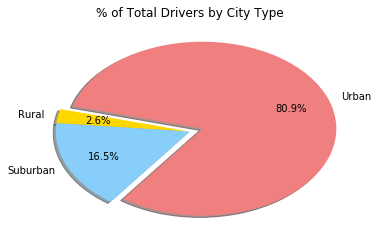

In [6]:
# Show Figure
plt.show()